<a href="https://colab.research.google.com/github/Alexiserges/ClustersCov./blob/main/ClustersCov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breaking the numbers down for each data set

We are  going to do some data analyst about 

covid-19 clusters situation in Malaysia accros the districts and state


We will be more focused on cases_new, Active_case, Recovered_case and deaths_case.


In [ ]:
###Let import all the library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

In [ ]:
###We find dataset from Ministry of Health Malaysia 
### Here is the link:https://github.com/MoH-Malaysia/covid19-public/tree/main/epidemic

### Let read the most important dataset related to our experimental study.
df_cases_state = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv')
df_cluters = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/clusters.csv')

In [ ]:
df_cases_state.head()

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,2020-01-25,Johor,4,4,0,4,0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2020-01-25,Kedah,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-25,Kelantan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,Melaka,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-25,Negeri Sembilan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_cluters.head()

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en
0,KLUSTER WARGA JEPUN,14,LEMBAH PANTAI,2020-03-01,2020-03-09,import,ended,0,3,0,267,0,0,3,NaN,NaN
1,KLUSTER UDA,"1,5,10,14,16",PELBAGAI,2020-03-04,2020-03-01,import,ended,0,144,0,1864,0,2,142,NaN,NaN
2,KLUSTER KEAGAMAAN (TABLIGH SRI PETALING),0,PELBAGAI,2020-03-13,2020-03-11,religious,ended,0,2022,0,42023,0,34,1988,NaN,NaN
3,KLUSTER TABLIGH NEW DELHI,"5,10,14,16",PELBAGAI,2020-03-16,2020-03-20,import,ended,0,24,0,57,0,0,24,NaN,NaN
4,KLUSTER AIROD,6,KUANTAN,2020-03-31,2020-03-31,workplace,ended,0,65,0,734,0,0,65,NaN,NaN


In [ ]:
print(df_cases_state.shape)
print(df_cluters.shape)


(15088, 25)
(7066, 16)


In [ ]:
df_cluters.describe()

,cases_new,cases_total,cases_active,tests,icu,deaths,recovered
count,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000
mean,0.003538,78.971978,0.098783,321.491367,0.001698,0.275120,78.566516
std,0.226019,200.555484,1.660031,1093.364432,0.041178,1.295272,200.203886
min,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,51.000000,0.000000,0.000000,18.000000
50%,0.000000,35.000000,0.000000,119.000000,0.000000,0.000000,35.000000
75%,0.000000,74.000000,0.000000,287.000000,0.000000,0.000000,74.000000
max,18.000000,7205.000000,69.000000,42100.000000,1.000000,37.000000,7204.000000


In [ ]:
#Merge dataframes into one for easy plotting

covid_cluster = df_cluters
covid_cluster['state'] =df_cases_state['state'] 
print(covid_cluster.head())




                                    cluster            state       district  \
0                       KLUSTER WARGA JEPUN            Johor  LEMBAH PANTAI   
1                               KLUSTER UDA            Kedah       PELBAGAI   
2  KLUSTER KEAGAMAAN (TABLIGH SRI PETALING)         Kelantan       PELBAGAI   
3                 KLUSTER TABLIGH NEW DELHI           Melaka       PELBAGAI   
4                             KLUSTER AIROD  Negeri Sembilan        KUANTAN   

  date_announced date_last_onset   category status  cases_new  cases_total  \
0     2020-03-01      2020-03-09     import  ended          0            3   
1     2020-03-04      2020-03-01     import  ended          0          144   
2     2020-03-13      2020-03-11  religious  ended          0         2022   
3     2020-03-16      2020-03-20     import  ended          0           24   
4     2020-03-31      2020-03-31  workplace  ended          0           65   

   cases_active  tests  icu  deaths  recovered summary_b

In [ ]:
covid_cluster.head()

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en
0,KLUSTER WARGA JEPUN,Johor,LEMBAH PANTAI,2020-03-01,2020-03-09,import,ended,0,3,0,267,0,0,3,NaN,NaN
1,KLUSTER UDA,Kedah,PELBAGAI,2020-03-04,2020-03-01,import,ended,0,144,0,1864,0,2,142,NaN,NaN
2,KLUSTER KEAGAMAAN (TABLIGH SRI PETALING),Kelantan,PELBAGAI,2020-03-13,2020-03-11,religious,ended,0,2022,0,42023,0,34,1988,NaN,NaN
3,KLUSTER TABLIGH NEW DELHI,Melaka,PELBAGAI,2020-03-16,2020-03-20,import,ended,0,24,0,57,0,0,24,NaN,NaN
4,KLUSTER AIROD,Negeri Sembilan,KUANTAN,2020-03-31,2020-03-31,workplace,ended,0,65,0,734,0,0,65,NaN,NaN


In [ ]:
covid_cluster.shape

(7066, 16)

In [ ]:
covid_cluster.tail()

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en
7061,KLUSTER PERSIARAN PUCHONG JAYA SELATAN,Pahang,PETALING,2022-08-19,2022-08-19,highRisk,active,0,13,13,23,0,0,0,Kluster ini merupakan hasil saringan bergejala...,This cluster is the result of a symptomatic sc...
7062,KLUSTER JALAN SLIM 2,Perak,MUALLIM,2022-08-19,2022-08-23,education,active,0,10,10,12,0,0,0,Kluster ini merupakan kluster berulang kali ke...,This cluster is the second recurring cluster i...
7063,KLUSTER JALAN SERI CHEEDING,Perlis,KUALA LANGAT,2022-08-20,2022-08-19,workplace,active,0,11,11,25,0,0,0,Kluster ini dikenalpasti hasil saringan bergej...,This cluster is the result of a symptomatic sc...
7064,KLUSTER INDUSTRI PERSIARAN GRAPHITE,Pulau Pinang,KUALA LANGAT,2022-08-20,2022-08-19,workplace,active,0,14,14,214,0,0,0,Kluster ini dikenalpasti hasil saringan bergej...,This cluster is the result of a symptomatic sc...
7065,KLUSTER JALAN BESAR TANJUNG 3,Sabah,KINTA,2022-08-22,2022-08-24,highRisk,active,1,26,26,74,0,0,0,Kluster ini merupakan kluster berulang kali ke...,This is a third recurring cluster involving pa...


In [ ]:
covid_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7066 entries, 0 to 7065
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cluster          7066 non-null   object
 1   state            7066 non-null   object
 2   district         7056 non-null   object
 3   date_announced   7066 non-null   object
 4   date_last_onset  7066 non-null   object
 5   category         7066 non-null   object
 6   status           7066 non-null   object
 7   cases_new        7066 non-null   int64 
 8   cases_total      7066 non-null   int64 
 9   cases_active     7066 non-null   int64 
 10  tests            7066 non-null   int64 
 11  icu              7066 non-null   int64 
 12  deaths           7066 non-null   int64 
 13  recovered        7066 non-null   int64 
 14  summary_bm       1455 non-null   object
 15  summary_en       1455 non-null   object
dtypes: int64(7), object(9)
memory usage: 883.4+ KB


In [ ]:
###Let check if there are data missing values
covid_cluster.isnull().sum()

cluster               0
state                 0
district             10
date_announced        0
date_last_onset       0
category              0
status                0
cases_new             0
cases_total           0
cases_active          0
tests                 0
icu                   0
deaths                0
recovered             0
summary_bm         5611
summary_en         5611
dtype: int64

In [ ]:

### Fill missing value ###
covid_cluster[['district']]=covid_cluster[['district']].fillna('')
covid_cluster[['summary_bm']]=covid_cluster[['summary_bm']].fillna('')
covid_cluster[['summary_en']]=covid_cluster[['summary_en']].fillna('')
covid_cluster.fillna(0, inplace=True)
print(covid_cluster.isna().sum().sum())

0


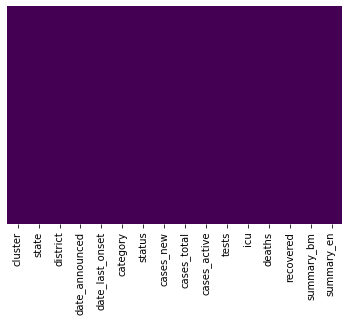

In [ ]:
sns.heatmap(covid_cluster.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
covid_cluster.isnull().sum()

cluster            0
state              0
district           0
date_announced     0
date_last_onset    0
category           0
status             0
cases_new          0
cases_total        0
cases_active       0
tests              0
icu                0
deaths             0
recovered          0
summary_bm         0
summary_en         0
dtype: int64

In [ ]:
#Top 13 countries with  cases_active
top_13_confirmed = covid_cluster.sort_values(by='cases_active', ascending=False).head(13)

fig = px.bar(top_13_confirmed.sort_values(by='cases_active', ascending=True),
             x="cases_active", y="cluster",
             title='CLusters Cases', text='cases_active',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#3498db', textposition='outside')

In [ ]:
#Top 13 countries with  recovered
top_13_recovered = covid_cluster.sort_values(by='recovered', ascending=False).head(13)

fig = px.bar(top_13_recovered.sort_values(by='recovered', ascending=True),
             x="recovered", y="cluster",
             title='CLusters Cases', text='recovered',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#2ecc71', textposition='outside')

In [ ]:
#Top 13 countries with  deaths
top_13_deaths= covid_cluster.sort_values(by='deaths', ascending=False).head(13)

fig = px.bar(top_13_deaths.sort_values(by='deaths', ascending=True),
             x="deaths", y="cluster",
             title='CLusters Cases', text='deaths',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#e74c3c', textposition='outside')

In [ ]:
#Top 13 clusters per cases_new 
top_13_cases_new = covid_cluster.sort_values(by='cases_new', ascending=False).head(13)

fig = px.bar(top_13_cases_new .sort_values(by='cases_new', ascending=True),
             x="cases_new", y="cluster",
             title='CLusters Cases', text='cases_new',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#5F9EA0', textposition='outside')

In [ ]:
#Top 13 cases_new per state
top_13_cases_new = covid_cluster.sort_values(by='cases_new', ascending=False).head(13)

fig = px.bar(top_13_cases_new .sort_values(by='cases_new', ascending=True),
             x="cases_new", y="state",
             title='CLusters Cases', text='cases_new',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#2F4F4F', textposition='outside')

In [ ]:
#Top 13 countries with  cases_active per State
top_13_confirmed = covid_cluster.sort_values(by='cases_active', ascending=False).head(13)

fig = px.bar(top_13_confirmed.sort_values(by='cases_active', ascending=True),
             x="cases_active", y="state",
             title='Active case', text='cases_active',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#FF7D40', textposition='outside')

In [ ]:
#Top 13 countries with  recovered per State
top_13_recovered = covid_cluster.sort_values(by='recovered', ascending=False).head(13)

fig = px.bar(top_13_recovered.sort_values(by='recovered', ascending=True),
             x="recovered", y="state",
             title='Recovered Cases', text='recovered',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#008B00', textposition='outside')

In [ ]:
#Top 13 deaths per state
top_13_deaths = covid_cluster.sort_values(by='deaths', ascending=False).head(13)

fig = px.bar(top_13_deaths.sort_values(by='deaths', ascending=True),
             x="deaths", y="state",
             title='Deaths Cases', text='deaths',
             template='plotly_dark', orientation='h')

fig.update_traces(marker_color='#EEB422', textposition='outside')